In [5]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold
from sklearn.naive_bayes import ComplementNB,MultinomialNB
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone (2).csv


## Function Definitions

In [7]:
# Function for KNN model for range of neighbours. 
def knn_model(n, train_x, train_y, test_x, test_y, name):
    knn_acc = []
    for i in range(1,n,5):
        knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance', p=1)
        knn.fit(train_x,train_y)
        y_pred = knn.predict(test_x)
        test_accuracy = accuracy_score(test_y, y_pred)
        train_score = cross_val_score(knn, train_x, train_y, cv=5, scoring='accuracy').mean()
        knn_acc.append((i,train_score ,test_accuracy))
    return pd.DataFrame(knn_acc, columns=['K','Training Accuracy '+name,'Test Accuracy '+name])

# Function for KNN model for a single fixed neighbour (best result)
def do_knn(train_x, train_y, test_x, test_y):
    knn = neighbors.KNeighborsClassifier(n_neighbors=175, weights='distance', p=1)
    knn.fit(train_x,train_y)
    y_pred = knn.predict(test_x)
    test_accuracy = accuracy_score(test_y, y_pred)
    cv_score = cross_val_score(knn, train_x, train_y, cv=5, scoring='accuracy').mean()
    return cv_score, test_accuracy

# K vs accuracy plot
def plot_accuracy_k(name, df):
    plt.title('kNN: ' + name +' parameters, K vs accuracy')
    plt.plot(df['K'].values, df['Test Accuracy '+name].values, label = 'Test accuracy '+name)
    plt.legend()
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

In [8]:
# Function to perform Naive Bayes classification. Returns the test accuracy and the cross validation score
def naive_bayes(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    cv_score = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
    y_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    return cv_score.mean(), test_accuracy


Reading the Abalone dataset and assigning column names.

In [9]:
# Setting the random state
random_state=27
abal_df = pd.read_csv("abalone.csv", sep=',')
# Assigning the column names below
col_names=['sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abal_df.columns=col_names

In [10]:
# Normalization the dataset with zscore
abal_df_z = abal_df.drop(columns=['sex','Rings'])
abal_df_z = abal_df_z.apply(stats.zscore)

## 1. Representation Learning
In this section, PCA and LDA are applied onto the dataset, analyse the resulting new representations in terms
of interpretability and classifier impact, then create new reduced dimension datasets.

###  1.1  Produce a plot of the data in the two lowest dimensions for PCA and LDA
### t-SNE method to produce a 2D plot of the datasets

 ####   PCA

PCA

PCA is a dimensionality reduction technique, where the features are extracted from the most variant directions. For the Abalone dataset, there are 7 predictor variables so performing a PCA might help in reducing the feature dimensions. Please note that for the further analysis 'sex' variable has been dropped from the dataset.

In [11]:
X = abal_df_z#.drop(columns=['sex','Rings']) #In the PCA everything is used except the target and these X will be used below
y = abal_df.Rings

(4176, 7)
(4176, 2)
explained variance ratio (first five components): [0.90786859 0.03992282]


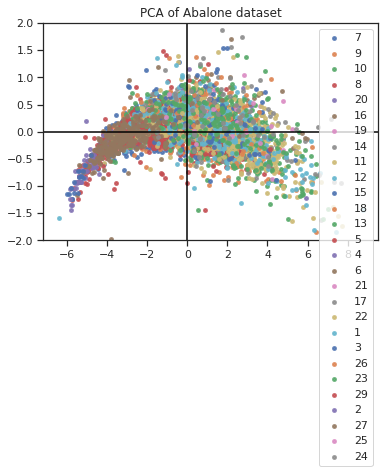

In [12]:
pca = PCA(n_components=2, random_state=random_state)
X_pca = pca.fit(X).transform(X)
target_names=abal_df.Rings.unique()
print(X.shape)
print(X_pca.shape)
print("explained variance ratio (first five components): %s"
    % str(pca.explained_variance_ratio_))
np.cumsum(pca.explained_variance_ratio_)

plt.figure()
#colors = ["navy", "turquoise", "darkorange","green","black"]
lw = 2
for i in target_names:
        plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], marker='.',label=i, cmap="Dark2",
        alpha=0.8, lw=lw)
plt.legend(loc="best")
plt.title("PCA of Abalone dataset")
plt.ylim(-2,2)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

From the graph it can be inferred that the clusters by the target Rings are not distinctly spread out. The latent information in the linear domain with respect to two components are overlapping.

Note (pending): planning to add biplot here. Perform the same for lda as well

https://www.reneshbedre.com/blog/principal-component-analysis.html

 #### LDA
 

LDA is a dimensionality reduction techniques, which is supervised, and projects the datapoints by increasing the between scatter and minimizing the within scatter. Hence we will have to pass the Rings as well while fitting the model.

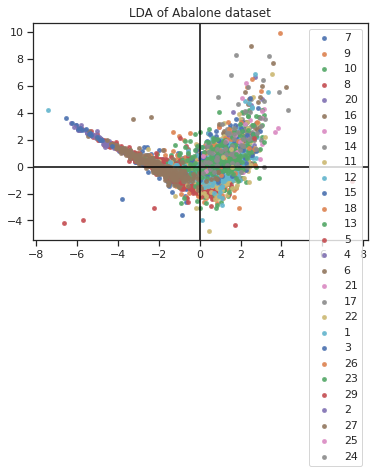

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda= lda.fit(X, y).transform(X)
plt.figure()
#colors = ["navy", "turquoise", "darkorange","green","black"]
lw = 2

#for  i, target_name in zip( list(range(len(target_names))), target_names):
  #  plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, lw=lw, label=target_name)
for i in target_names:
        plt.scatter(
        X_lda[y == i, 0], X_lda[y == i, 1], marker='.',label=i, cmap="Dark2",
        alpha=0.8, lw=lw)    
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of Abalone dataset")
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')


 #### TSNE
Is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [14]:
n_components = 2
X_t = manifold.TSNE(n_components=2, init="pca", random_state=27)
Y = X_t.fit_transform(X)
Y.shape
tsne_result_df = pd.DataFrame({'tsne_1': Y[:,0], 'tsne_2': Y[:,1], 'label': y})


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


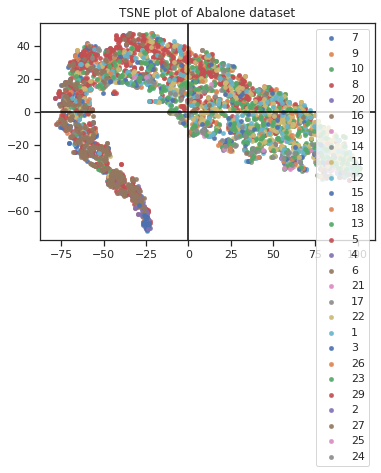

In [15]:
for i in target_names:
        plt.scatter(
         tsne_result_df[tsne_result_df.label == i ].tsne_1, tsne_result_df[tsne_result_df.label == i ].tsne_2, marker='.',label=i, cmap="Dark2",
        alpha=0.8, lw=lw)    
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("TSNE plot of Abalone dataset")
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

t-sne plot is used for investigation or evaluating segmentations. In our case, the extraploation has not helped much in clustering the Abalone Rings with the help of features.

###  1.2  Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.


We will calculate the top 5 components of the PCA for the abalone dataset.

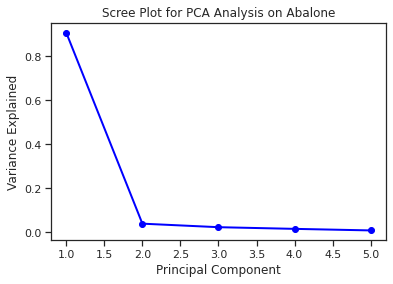

In [16]:
pca = PCA(n_components=5)  ## 5 components
pca_m=pca.fit(X)
X_pca = pca.fit(X).transform(X)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for PCA Analysis on Abalone')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [17]:
PC_values, pca.explained_variance_ratio_

(array([1, 2, 3, 4, 5]),
 array([0.90786859, 0.03992282, 0.02390485, 0.01629745, 0.00923717]))

In [18]:
print(pca_m.components_)
print (np.linalg.norm(pca_m.components_[0],2))

[[ 0.38325098  0.38357624  0.3481428   0.39067378  0.37818746  0.38151246
   0.37892088]
 [ 0.03794443  0.06545225  0.86677912 -0.23330134 -0.34803711 -0.2529843
  -0.05839327]
 [-0.59332399 -0.58531027  0.31502011  0.23080224  0.23149115  0.27016151
   0.16215975]
 [ 0.08927448  0.00825471  0.16559646 -0.05226016  0.4961999   0.14097871
  -0.83409788]
 [-0.04046528 -0.00851816  0.02706061  0.11018175  0.54533534 -0.80933329
   0.18167746]]
1.0


 Most of the variance is explained by the first  component (~90%) and the second component explains 0.04% of the variance.This does look promising but let us examine the weights assigned to different feature. The weights virtually look more or less same. 
The pca_m.components_ object contains the weights (also called as ‘loadings’) of each Principal Component. It is using these weights that the final principal components are formed. These weights are Eigen values.The first component weights are not strongly increasing or decreasing in one direction  which might not help us with imroving model accuracy much with PCA reduced dataset.

https://online.stat.psu.edu/stat505/lesson/11/11.4

https://www.quora.com/Is-standardization-and-normalization-the-same-in-PCA-When-should-or-should-not-we-normalize-data-in-PCA

https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

### 1.3 & 1.4  Best reduced Dimensionality

A user defined function to fit the KNN with best value of 175 as achieved in the last assignment.The user defined function calls KNN on LDA, PCA and raw datasets below. 

In [19]:
## Split the model into test and train set
X=abal_df_z # dropping the target variable
y=abal_df.Rings 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=random_state) # splitting the dataset into test and train based on 80% and 20% split

In [20]:

n_classes = len(np.unique(y))
random_state=27  ## Setting random seed of 27
n_neighbors=175

In [21]:
## Function block can be collapseds
# Reduce dimension to 2 with PCA    

def dim_acc(x_train, x_test, y_train, y_test):
    pca_lda_knn_acc = []
    for j in range(2,8):
            pca = PCA(n_components=j, random_state=random_state)

            # Reduce dimension to 2 with LinearDiscriminantAnalysis
            lda =  LinearDiscriminantAnalysis(n_components=j)

            # Use a nearest neighbor classifier to evaluate the methods
            knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='uniform',metric='manhattan')

            # Make a list of the methods to be compared
            dim_reduction_methods = [("PCA", pca), ("LDA", lda),("knn",knn)]
            for i, (name, model) in enumerate(dim_reduction_methods):

                # Fit the method's model
                if name!="knn":
                        model.fit(x_train, y_train)

                        # Fit a nearest neighbor classifier on the embedded training set
                        knn.fit(model.transform(x_train), y_train)

                        # Compute the nearest neighbor accuracy on the embedded test set
                        acc_knn = knn.score(model.transform(x_test), y_test)
                        pca_lda_knn_acc.append((j,name,acc_knn))
                else:
                        model.fit(x_train, y_train)

                        # Compute the nearest neighbor accuracy on the embedded test set
                        acc_knn = knn.score((x_test), y_test)
                        #print("Plain KNN Accuracy is %s",acc_knn)
                        pca_lda_knn_acc.append((j,name,acc_knn))

                        # Embed the data set in 2 dimensions using the fitted model

    return  pd.DataFrame(pca_lda_knn_acc, columns=['Dim','Dim_red','Test_Accuracy'])
        # Plot the projected points and show the evaluation score
    #plt.show()

In [22]:
DF=dim_acc(x_train, x_test, y_train, y_test)

(Pending) : Plot training error.

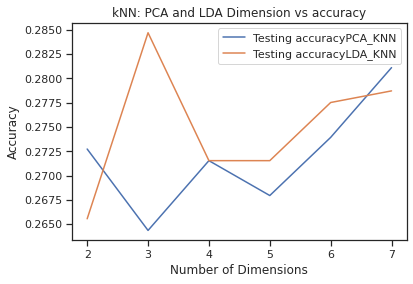

In [23]:
plt.title('kNN: ' + 'PCA and LDA Dimension vs accuracy')
plt.plot(DF[DF['Dim_red']=="PCA"].Dim.values, DF[DF['Dim_red']=="PCA"].Test_Accuracy.values, label = 'Testing accuracy'+'PCA_KNN')
plt.plot(DF[DF['Dim_red']=="LDA"].Dim.values, DF[DF['Dim_red']=="LDA"].Test_Accuracy.values, label =  'Testing accuracy'+'LDA_KNN')
plt.legend()
plt.legend()
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.show()

From the above plot it can be inferred that the LDA method for dimensionality reduction gives the best accuracy of around 29% approximately.We will choose four components of LDA and in the further analysis comparison in performed between LDA and raw data.

Note that going forward the below split with respect to raw and LDA extracted dataset will be used in the analysis.

In [24]:
#Original data (normalised with z score)
X=abal_df.drop(columns=['sex','Rings'])
y=abal_df.Rings
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=random_state)
scaler = MinMaxScaler()
# After PCA, the data is centered so there can be negative values which naive bayes will not accept, 
# so performing min max normalization so that the features are non negative
x_train_mm = scaler.fit_transform(x_train)
x_test_mm = scaler.transform(x_test)

In [25]:
lda = LinearDiscriminantAnalysis(n_components=4)
components = lda.fit_transform(x_train,y_train)
components_2=lda.transform(x_test)
x_train_lda = pd.DataFrame(data = components)
x_test_lda = pd.DataFrame(data = components_2)
#x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(ldaDf, y, test_size=0.2, random_state=27)


### 2 Naive Bayes Classifier

#### Normalised dataset and Multinomial NB

In [26]:
cv_score_mnb, test_acc_mnb = naive_bayes(MultinomialNB(), x_train_mm, y_train, x_test_mm, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


#### LDA extracted dataset and Multinomial NB

In [27]:
x_train_lda_mm = scaler.fit_transform(x_train_lda)
x_test_lda_mm = scaler.transform(x_test_lda)
cv_score_mnb_lda, test_acc_mnb_lda = naive_bayes(MultinomialNB(), x_train_lda_mm, y_train, x_test_lda_mm, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


#### Normalised dataset and Complement NB

In [28]:
cv_score_cnb, test_acc_cnb = naive_bayes(ComplementNB(), x_train_mm, y_train, x_test_mm, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


#### LDA extracted dataset and Complement NB

In [29]:
cv_score_cnb_lda, test_acc_cnb_lda = naive_bayes(ComplementNB(), x_train_lda_mm, y_train, x_test_lda_mm, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [30]:
# Consolidating the results (Test accuracy) of the four models.

print(" Naive Bayes Model and Accuracy Log ")
results_mnb_cnb = [('Test Accuracy', test_acc_mnb, test_acc_mnb_lda, test_acc_cnb, test_acc_cnb_lda)]
mnb_df = pd.DataFrame(results_mnb_cnb,columns=['Model','Multinomial raw data', 'Multinomial LDA data'
                                          ,'Complement raw data','Complement LDA data'])
mnb_df.reset_index(drop=True, inplace=True)
mnb_df.set_index('Model').T

 Naive Bayes Model and Accuracy Log 


Model,Test Accuracy
Multinomial raw data,0.151914
Multinomial LDA data,0.151914
Complement raw data,0.196172
Complement LDA data,0.241627


Complement NB is particularly suited for datasets which have high imbalance in the dataset. In case of Abalone "Rings" target variable suffers from imbalance in the representation. In this case the Complement NB gives better test accuracy in case of both LDA and raw dataset. Also note that the feature reduction using supervised LDA has certainly improved the model performance.

Complement works better because instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all the classes. For a numerical example please refer to this.

https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes


https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/

Note(pending):Why dimensionality reduction has no impact over multinb?


### 3 Decision Tree

Classification on dataset using Decision Trees. There are number of parameters that affect the decision tree here we are varying the maximum depth value and running a grid search on that to get the get the best depth value in decision tree. Also, normalization is not required in the case of decision tree because it is not affected by the change in the scale of different attributes.

In [31]:
##Data normlisation is not required
# Function to caculate the best set of parameters and the cross val score of that best model
def decsion_tree_gs(x_train, y_train,x_test):
    params = {
              'max_depth':list(range(2,20))
             }
    gs_dtc = GridSearchCV(DecisionTreeClassifier(random_state=27), params, verbose=1, cv=5, return_train_score=True, n_jobs=-1)

    gs_results_dtc = gs_dtc.fit(x_train, y_train)
    print('The best classifer is for the values - ')
    print('One leave out Accuracy of the best model - ', gs_results_dtc.best_score_)
    print(gs_results_dtc.best_estimator_)
    print(gs_results_dtc.best_params_)
    results_df = pd.DataFrame(gs_results_dtc.cv_results_['params'])
    results_df["Train Accuracy"] = gs_results_dtc.cv_results_['mean_train_score']
    results_df["Valid Accuracy"] = gs_results_dtc.cv_results_['mean_test_score']
    return gs_results_dtc, results_df
    
# Function to calculate the test accuracy of the model using the best parameters ?R remove the function
def decision_tree_classifier(max_depth, x_train, y_train, x_test, y_test):
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=27)
    dtc.fit(x_train, y_train)
    scores = cross_val_score(dtc, x_train, y_train, cv = 5, scoring='accuracy',)
    y_pred = dtc.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    return dtc, scores.mean(), test_accuracy

# Plot of accuracy vs the depth for the Decision Tree Classifier
def plot_depth_accuracy(df,mod): 
    plt.title('Decison Tree: '+mod +' Max Depth vs Accuracy (Train and Test)')
    plt.plot(df['max_depth'].values, df['Train Accuracy'].values, label = 'Mean Train Accuracy')
    plt.plot(df['max_depth'].values, df['Valid Accuracy'].values, label = 'Valid Accuracy')
    plt.legend()
    plt.legend()
    plt.xlabel('Max_Depth')
    plt.ylabel('Accuracy')
    plt.show()

#### 3.1. Evaluate the best settings for classification on the raw dataset and LDA extracted dataset

In [32]:
best_model_dt, df_dtc = decsion_tree_gs(x_train, y_train,x_test) ## call the function and pass the parameters

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The best classifer is for the values - 
One leave out Accuracy of the best model -  0.2565868263473054
DecisionTreeClassifier(max_depth=5, random_state=27)
{'max_depth': 5}


It can be observed that the cross val score for Decision Tree Classifier using the raw data based on the best depth of 5 is 25.6%.

In [34]:
best_model_lda, df_dtc_lda = decsion_tree_gs(x_train_lda, y_train,x_test_lda)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


The best classifer is for the values - 
One leave out Accuracy of the best model -  0.255688622754491
DecisionTreeClassifier(max_depth=4, random_state=27)
{'max_depth': 4}


The cross val score for Decision Tree Classifier using the LDA extracted dataset based on the best depth of 4 is ~26%.

#### 3.2  Produce a plot showing the mean accuracy above parameter

We will call the user defined function and pass on the dataset storing the parameters and the corresponding accuracy value based on the grid search run. We will be plotting both the train and test accuracy to assess the model performance as a function of depth.

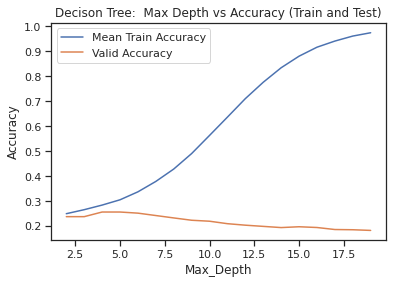

In [35]:
plot_depth_accuracy(df_dtc,"")

The method selects tree depth 5 because it achieves the best average accuracy on training data using cross-validation folds with size 5. When more nodes are added to the tree, it is clear that the cross-validation accuracy starts declining.
The tree of depth after 10 observes a sharp rise, this means that each leaf of the tree contains very few samples and the class of that sample will be the prediction.This is classic case of overfitting the tree.
The tree depth 5 we chose via cross-validation that helps us avoiding overfitting and gives a better generalisation.

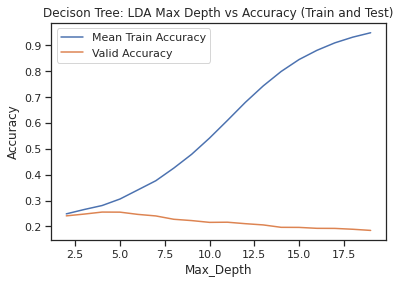

In [36]:
plot_depth_accuracy(df_dtc_lda,"LDA")

The method selects tree depth 4 because it achieves the best average accuracy on training data using cross-validation folds with size 5.Passing the representation learning to the decision tree has not improved the model validation accuracy much. The accuracy value is around the similar value of 26% but in comparison the overfitting has been controlled to an extent approximately by ~3%. The change in the slope of the curve.

https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

#### Decision Trees Rules with Abalone raw data

Let us look at the decision rules that the model has designed to sgregate the data. plot_tree function from Scikit package.

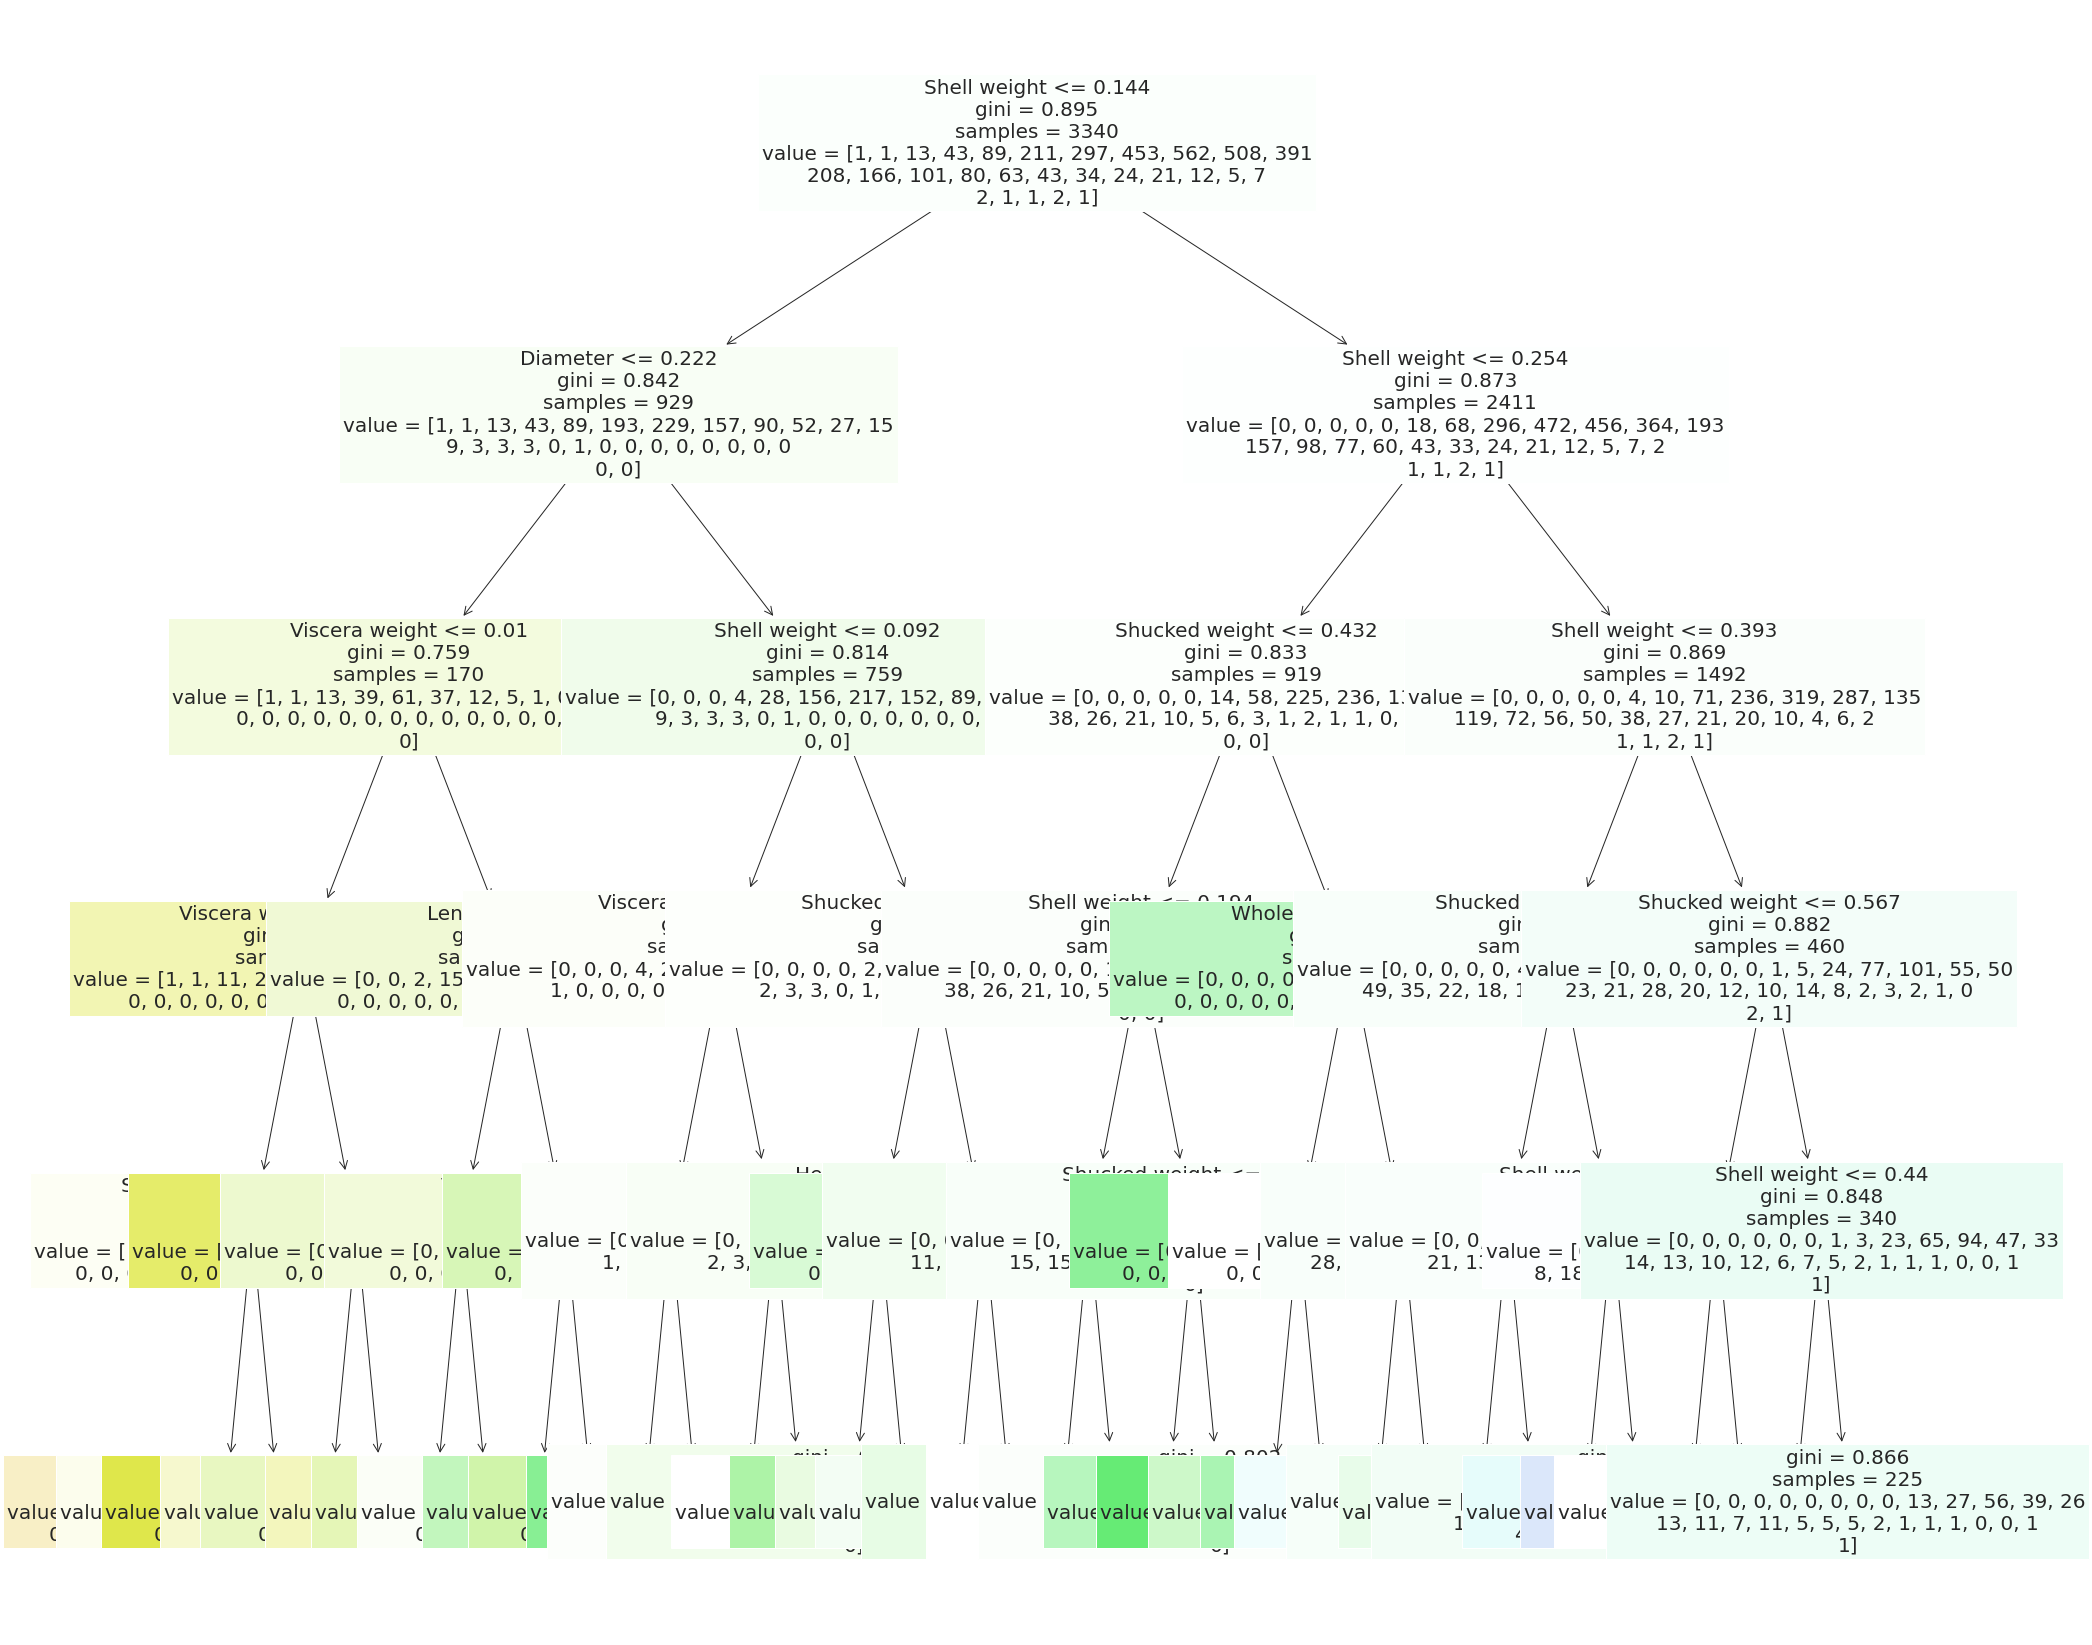

In [38]:
fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(best_model_dt.best_estimator_, fontsize=20,
                                    feature_names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                                    'Viscera weight', 'Shell weight'],filled=True
)
plt.show()

In [40]:
feat_importance = best_model_dt.best_estimator_.tree_.compute_feature_importances(normalize=False)
#print("feature importance = " + str(feat_importance))
data = {'Feature':['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'], 'feat_importance': feat_importance}  
df_feature_imp=pd.DataFrame(data)
df_feature_imp

,Feature,feat_importance
0,Length,0.000659
1,Diameter,0.012085
2,Height,0.001063
3,Whole weight,0.000994
4,Shucked weight,0.017625
5,Viscera weight,0.006549
6,Shell weight,0.057019


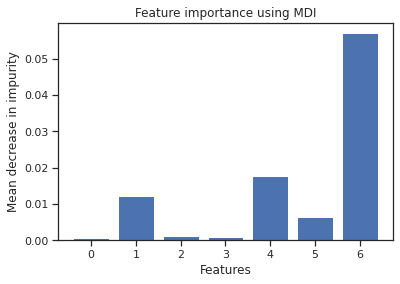

In [41]:
plt.bar([x for x in range(len(feat_importance))], feat_importance)
plt.title('Feature importance using MDI')
plt.xlabel('Features')
plt.ylabel('Mean decrease in impurity')
plt.show()

The root node here seems to be "Shell weight" which coincidentially has the highest feature importance value in comparison.Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits. In the case of Abalone the contribution of the features towards classifying the target variable is poor.

https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees

https://medium.com/@soumendu1995/understanding-feature-importance-using-random-forest-classifier-algorithm-1fb96f2ff8a4


### 4.  Random forest

#### 4.1.1 Random forest with normalised data

Define a function for Random forest with the max depth and estimators as the two parameters used for hyperparameter tuning.

In [42]:
def RF_gs(x_train, y_train,x_test):
    d_l=2
    d_u=20
    tree_para = {'max_depth':list(range(d_l,d_u,2)),'n_estimators':[20,50,70,90,100,120,150, 175, 200, 220, 250,300]}  #range(t_l,t_u,2)}
    clf_rf =  GridSearchCV(RandomForestClassifier(),tree_para,cv=5,return_train_score=True,n_jobs=-1)
    #gs_dtc = GridSearchCV(DecisionTreeClassifier(random_state=27), params, verbose=1, cv=5)
    clf_rf = clf_rf.fit(x_train, y_train)
    scores_raw_rf = cross_val_score(clf_rf, x_train, y_train, cv = 5, scoring='accuracy')
    print('The best classifer is for the values - ')
    print('One leave out Accuracy of the best model - ', clf_rf.best_score_)
    print(clf_rf.best_estimator_)
    print(clf_rf.best_params_)
    y_pred_rf = clf_rf.predict(x_test)
    test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
    results_df = pd.DataFrame(clf_rf.cv_results_['params'])
    results_df["Train Accuracy"] = clf_rf.cv_results_['mean_train_score']
    results_df["Valid Accuracy"] = clf_rf.cv_results_['mean_test_score']
    return clf_rf, results_df
    

In [43]:
best_model, df_rf = RF_gs(x_train, y_train,x_test) ## call the function and pass the parameters (25 minutes run time)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than

The best classifer is for the values - 
One leave out Accuracy of the best model -  0.26826347305389225
RandomForestClassifier(max_depth=6, n_estimators=50)
{'max_depth': 6, 'n_estimators': 50}


#### 4.1.2 Random forest with LDA 

In [44]:
best_model_lda, results_rf_lda = RF_gs(x_train_lda, y_train,x_test_lda)  #(22 min)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

The best classifer is for the values - 
One leave out Accuracy of the best model -  0.26467065868263473
RandomForestClassifier(max_depth=4, n_estimators=20)
{'max_depth': 4, 'n_estimators': 20}


#### 4.2 Heatplots for the models best_model and best_model_lda 

In [49]:
def heatplot_depth_estimators_accuracy_valid(df ,model_n):
        #Pivoting the dataframe for plotting heat map
        ac_df=df.pivot(index='max_depth',columns='n_estimators',values='Valid Accuracy')
        #Plotting the graph
        plt.figure(figsize=(15,8))
        sns.heatmap(data=ac_df,annot=True)
        plt.title("heat plot of accuracy with "+ model_n)
        plt.show()
def heatplot_depth_estimators_accuracy_train(df,model_n):
        #Pivoting the dataframe for plotting heat map
        ac_df=df.pivot(index='max_depth',columns='n_estimators',values='Train Accuracy')
        #Plotting the graph
        plt.figure(figsize=(15,8))
        sns.heatmap(data=ac_df,annot=True)
        plt.title("heat plot of accuracy with "+ model_n)
        plt.show()

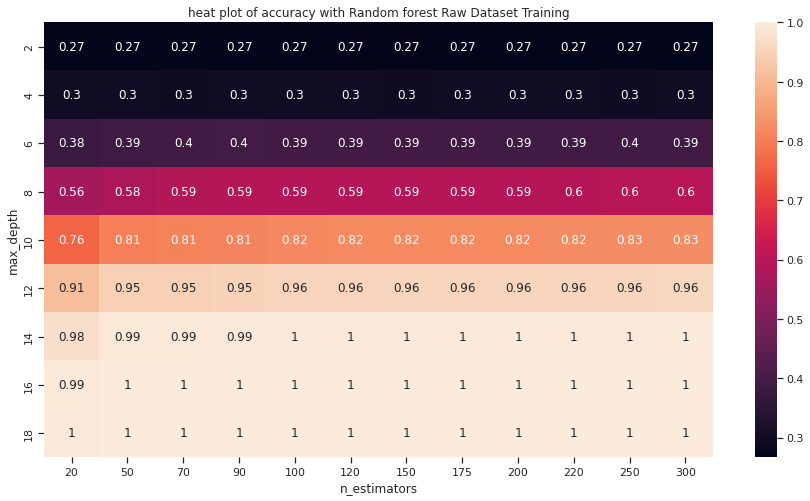

In [52]:
model_n="Random forest Raw Dataset Training"
heatplot_depth_estimators_accuracy_train(df_rf,model_n)


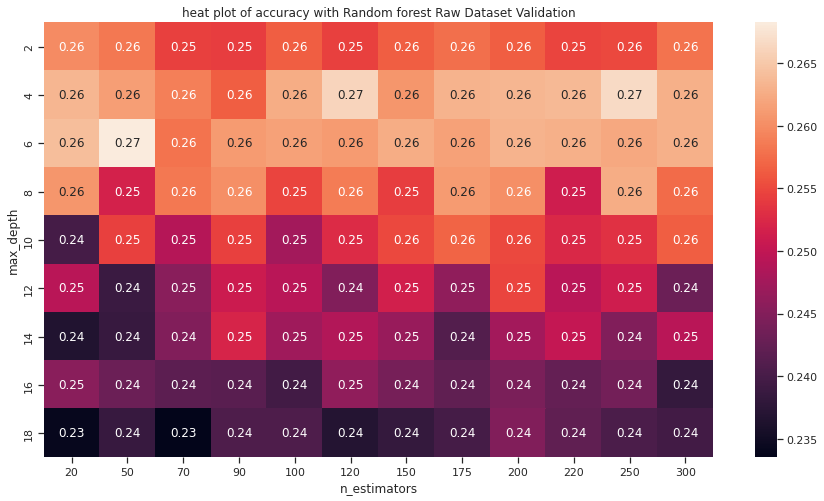

In [53]:

model_n="Random forest Raw Dataset Validation"
heatplot_depth_estimators_accuracy_valid(df_rf,model_n)

The heatmap is plotted for both the training and validation accuracy based on K fold cross validatpion. It can be clearly observed that the increase in the number of estimators the model is overfitting. Based on the cross validation the reccommended best parameters are estimators 50 and max depth 6.This is the best combination for raw dataset.

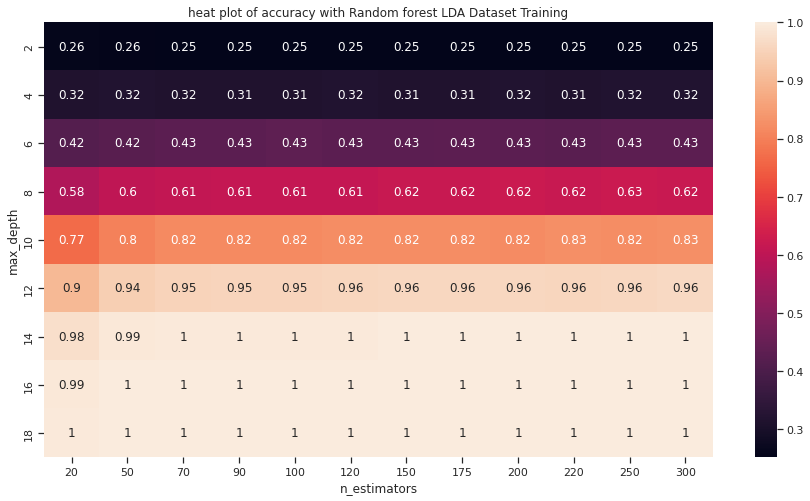

In [54]:
model_n="Random forest LDA Dataset Training"
heatplot_depth_estimators_accuracy_train(results_rf_lda,model_n)

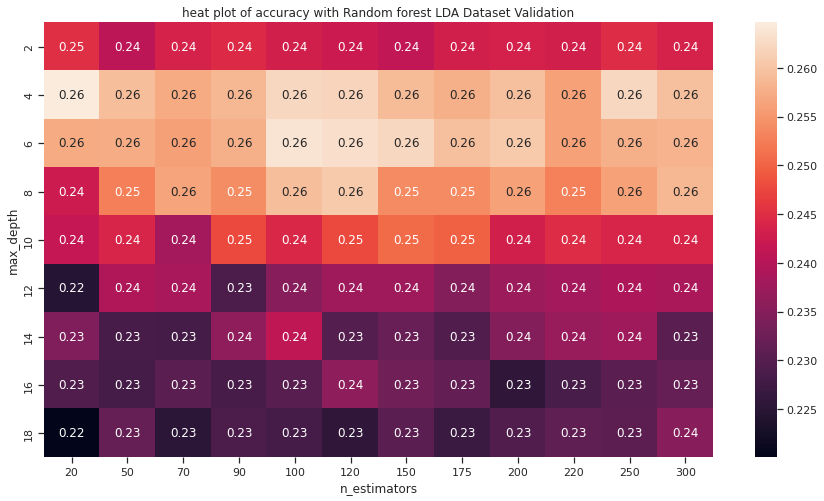

In [57]:
model_n="Random forest LDA Dataset Validation"
heatplot_depth_estimators_accuracy_valid(results_rf_lda,model_n)

The heatmap is plotted for both the training and validation accuracy based on K fold cross validatpion. It can be clearly observed that the increase in the number of estimators the model is overfitting. Based on the cross validation the reccommended best parameters are estimators 20 and max depth 4.This is the best combination for LDA dataset with validation accuracy of 27%.

### 5. GradientBoostingClassifier

In [73]:
def gbt(x_train, y_train,x_test):
    tree_para = {'n_estimators': [20,50,70,90,100,120,150,200,220]}  #[20,50,70,90,100]}  #range(t_l,t_u,2)}
    clf =  GridSearchCV(GradientBoostingClassifier(learning_rate=0.01),tree_para,cv=5,return_train_score=True,n_jobs=-1)
    clf = clf.fit(x_train, y_train)
    scores_raw_rf = cross_val_score(clf, x_train, y_train, cv = 5, scoring='accuracy')
    print('The best classifer is for the values - ')
    print('One leave out Accuracy of the best model - ', clf.best_score_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    y_pred_rf = clf.predict(x_test)
    test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
    results_df = pd.DataFrame(clf.cv_results_['params'])
    results_df["Train Accuracy"] = clf.cv_results_['mean_train_score']
    results_df["Valid Accuracy"] = clf.cv_results_['mean_test_score']
    return clf, results_df

def plot_depth_accuracy_gb(df,mod): 
    plt.title('Gradient Boosted Tree: '+mod +' Estimators vs Accuracy (Train and Test)')
    plt.plot(df['n_estimators'].values, df['Train Accuracy'].values, label = 'Mean Train Accuracy')
    plt.plot(df['n_estimators'].values, df['Valid Accuracy'].values, label = 'Valid Accuracy')
    plt.legend()
    plt.legend()
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.show()

#### 5.1.1 Gradient Boosted Trees with raw dataset

In [61]:
best_model_gbt, df_gbt_raw = gbt(x_train, y_train,x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

The best classifer is for the values - 
One leave out Accuracy of the best model -  0.2544910179640719
GradientBoostingClassifier(learning_rate=0.01)
{'n_estimators': 100}


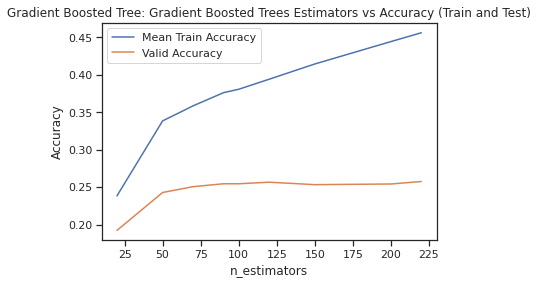

In [77]:
plot_depth_accuracy_gb(df_gbt_raw,"Gradient Boosted Trees")

The validation accuracy sauturates after approximately 50 estimators. Beyond that point only training error is coming down which indicates that the estimators are fitting tightly around the training data. Note that the overfitting here does not drastically reach 80%-100% as in the case of random forest. This is generally more prone to overfitting. We can choose the best estimator here to be 50.

#### 5.1.2 Gradient Boosted Trees with LDA  dataset

In [ ]:
best_model_gbt_lda, df_gbt_lda = gbt(x_train_lda, y_train,x_test_lda)

In [ ]:
plot_depth_accuracy_gb(df_gbt_raw,"Gradient Boosted Trees")

## 6. Final Results